In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/Smartphone_clean_eng.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           69 non-null     object
 1   Age              69 non-null     object
 2   Occupation       69 non-null     object
 3   Salary           69 non-null     object
 4   OperationSystem  69 non-null     object
 5   Game             69 non-null     object
 6   Socialmedia      69 non-null     object
 7   Entertainment    69 non-null     object
 8   Photo/Video      69 non-null     object
 9   Brands           69 non-null     object
dtypes: object(10)
memory usage: 5.5+ KB


In [4]:
#Transform data into One-hor encoder
df_encoded = pd.get_dummies(df, columns=['Gender','Age','Occupation','Salary',
                                         'Game','Socialmedia',
                                         'Entertainment','Photo/Video','Brands'],dtype=int)

df_encoded.head()

,OperationSystem,Gender_Female,Gender_Male,Age_21-25 yrs,Age_26-30 yrs,Age_31-35 yrs,Age_36-40 yrs,Occupation_College_Student,Occupation_Freelancer,Occupation_Gov_Official,...,Photo/Video_Most often,Photo/Video_Often,Photo/Video_Quite little,Brands_Google,Brands_Iphone,Brands_Nokia,Brands_Oneplus,Brands_Oppo,Brands_Samsung,Brands_ยังไม่รู้
0,IOS,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,IOS,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,IOS,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,IOS,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,IOS,0,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
#Define the features and target variable
X = df_encoded.drop('OperationSystem', axis=1)
y = df_encoded['OperationSystem']

In [16]:
#Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [17]:
#Create a LogisticRegression object and fit it to the data
model = LogisticRegression()
model.fit(X_train, y_train)

#Predicted data
y_predict = model.predict(X_test)

In [18]:
#Results : Model score (R-Sq)
model.score(X_test, y_test)

0.8095238095238095

In [19]:
#Result : Classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

     Android       0.00      0.00      0.00         2
         IOS       0.89      0.89      0.89        19

    accuracy                           0.81        21
   macro avg       0.45      0.45      0.45        21
weighted avg       0.81      0.81      0.81        21



In [9]:
#Import SHAP
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.4 MB/s eta 0:00:00


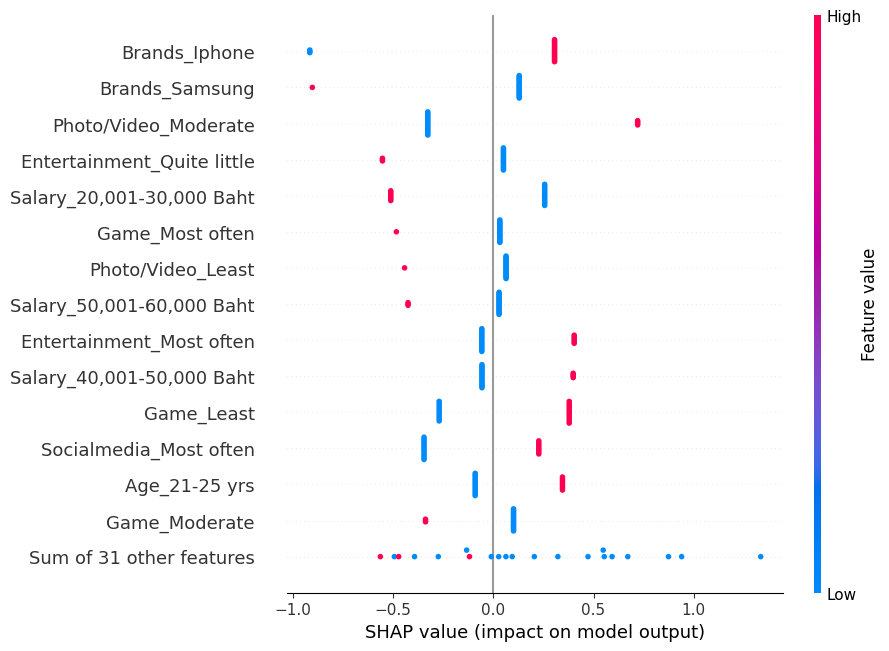

In [20]:
#Ranks features by their importance, you can see that Brand (Iphone) is the most important features
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values,order=shap_values.abs.max(0),max_display=15)

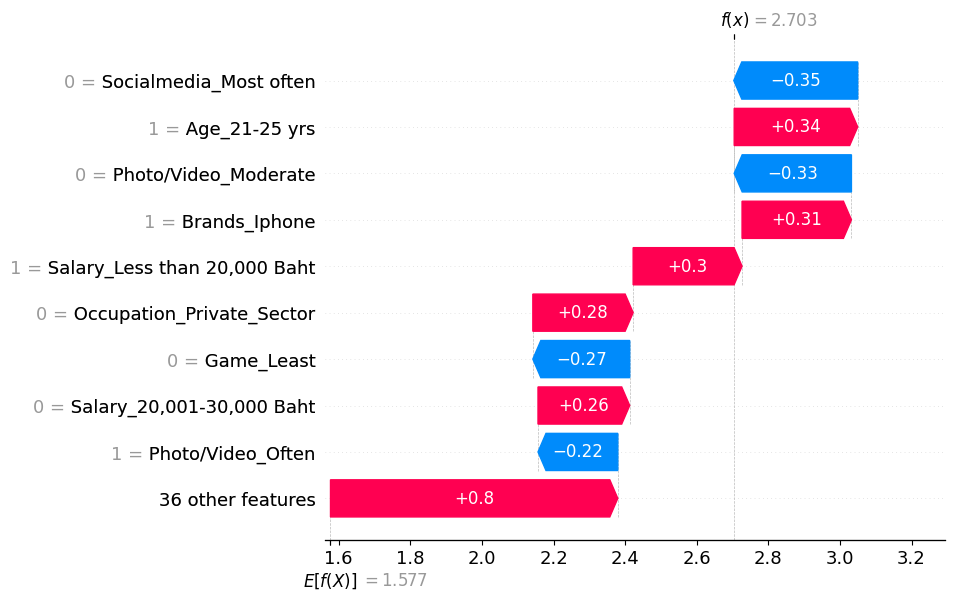

In [21]:
#Analyze one sample (random) from test set
randon_sample = X_test.sample(n=1)

predictions = model.predict(randon_sample)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(randon_sample)

shap.plots.waterfall(shap_values[0])
